# `Inception Model / Google Net Model`
![](https://i.stack.imgur.com/hp2qp.png)
- Designed by google.
- It takes an image and parallelly computes using it's filters.
- Google is using skip connection.
- **1X1 filter** is **bottleneck filter**.
- Each and every pixel is multiplied by filter, so actuall image size is same.
- [cv2.resize](https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/)

## `Brain Tumor detection`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

Using TensorFlow backend.


In [2]:
dataset = r"F:\brain_tumor_dataset"
yes_path = r"F:\brain_tumor_dataset\yes"
no_path = r"F:\brain_tumor_dataset\no"

### yes sample

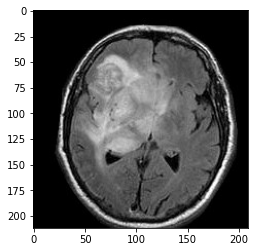

In [3]:
img = cv2.imread(yes_path + '\\' + 'Y2.jpg')
plt.imshow(img)

In [4]:
img.shape

(212, 209, 3)

### no sample

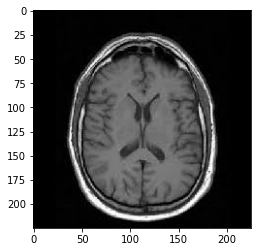

In [5]:
img = cv2.imread(no_path + '\\' + '40 no.jpg')
plt.imshow(img)

In [6]:
img.shape

(225, 225, 3)

### shapes of images are different, we have to process the images later
### Lets check the number of images in both directory

In [7]:
vals = [yes_path,no_path]
print('Yes :',os.listdir(vals[0]).__len__())
print('No :',os.listdir(vals[1]).__len__())

Yes : 155
No : 98


### Data is not balanced
### Read the images

In [8]:
classes = ['yes','no']
filepath = []
labels = []
for i,j in zip(vals,classes):
    filelist = os.listdir(i)
    print(filelist)
    for name in filelist:
        x = os.path.join(i,name)
        filepath.append(x)
        labels.append(j)
print(filepath.__len__(),labels.__len__())

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg', 'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg', 'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG', 'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG', 'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG', 'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg', 'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG', 'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG', 'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg', 'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg', 'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg', 'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG', 'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg', 'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG', 'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG', 'Y249.JPG', 'Y25.jpg', 'Y250.jpg', 'Y251.JPG', 'Y252.jpg', 'Y253.JPG', 'Y254.jpg', 'Y255.JPG', 'Y256.JPG',

In [9]:
filepath[:5]

['F:\\brain_tumor_dataset\\yes\\Y1.jpg',
 'F:\\brain_tumor_dataset\\yes\\Y10.jpg',
 'F:\\brain_tumor_dataset\\yes\\Y100.JPG',
 'F:\\brain_tumor_dataset\\yes\\Y101.jpg',
 'F:\\brain_tumor_dataset\\yes\\Y102.jpg']

In [10]:
labels[:5]

['yes', 'yes', 'yes', 'yes', 'yes']

In [11]:
datazip = list(zip(filepath,labels))
datazip[:5]

[('F:\\brain_tumor_dataset\\yes\\Y1.jpg', 'yes'),
 ('F:\\brain_tumor_dataset\\yes\\Y10.jpg', 'yes'),
 ('F:\\brain_tumor_dataset\\yes\\Y100.JPG', 'yes'),
 ('F:\\brain_tumor_dataset\\yes\\Y101.jpg', 'yes'),
 ('F:\\brain_tumor_dataset\\yes\\Y102.jpg', 'yes')]

In [12]:
pathframe = pd.DataFrame(datazip,columns=['Filepath','Labels'])
pathframe.head()

,Filepath,Labels
0,F:\brain_tumor_dataset\yes\Y1.jpg,yes
1,F:\brain_tumor_dataset\yes\Y10.jpg,yes
2,F:\brain_tumor_dataset\yes\Y100.JPG,yes
3,F:\brain_tumor_dataset\yes\Y101.jpg,yes
4,F:\brain_tumor_dataset\yes\Y102.jpg,yes


In [13]:
pathframe.tail()

,Filepath,Labels
248,F:\brain_tumor_dataset\no\No18.jpg,no
249,F:\brain_tumor_dataset\no\No19.jpg,no
250,F:\brain_tumor_dataset\no\No20.jpg,no
251,F:\brain_tumor_dataset\no\No21.jpg,no
252,F:\brain_tumor_dataset\no\No22.jpg,no


### it contains both yes and no

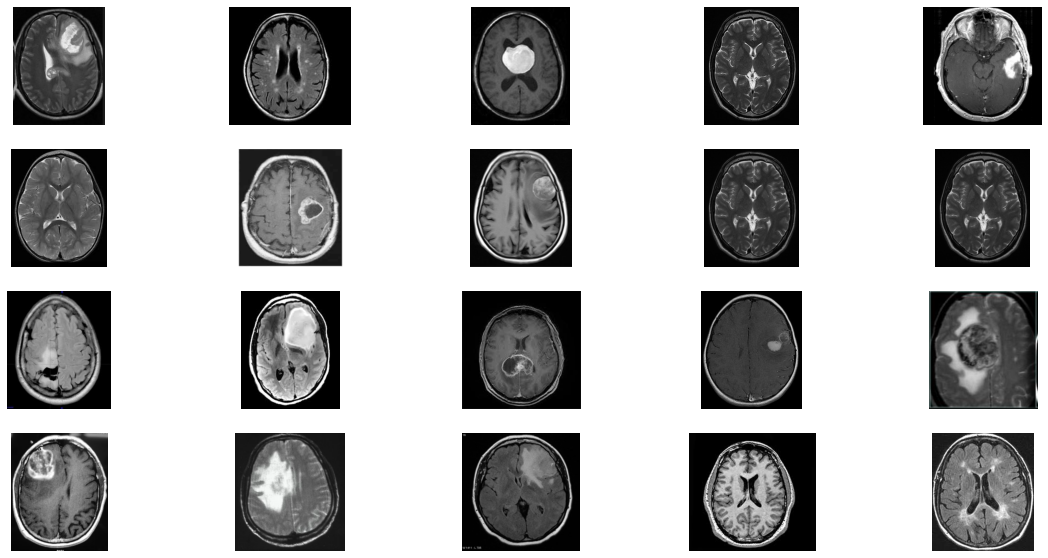

In [14]:
plt.figure(figsize=(20,10))
for i in range(20):
    vals = np.random.randint(len(pathframe))
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.imread(pathframe.Filepath[vals]))
    plt.axis('off')
plt.show()

### there are some healthy and some effected brains
### Preprocessing

In [15]:
train,test = train_test_split(pathframe,test_size=0.1,random_state=42)
train_new,valid = train_test_split(train,test_size=0.1,random_state=42)

In [16]:
print(train_new.shape)
print(valid.shape)
print(test.shape)

(204, 2)
(23, 2)
(26, 2)


In [22]:
train_datagen = ImageDataGenerator(rescale=1.0/255,rotation_range=40,width_shift_range=.10,
                                  height_shift_range=0.1,shear_range=0.1,
                                  zoom_range=0.2,horizontal_flip=True,
                                  vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [23]:
train_gen = train_datagen.flow_from_dataframe(dataframe=train_new,
                                             x_col='Filepath',y_col='Labels',
                                             batch_size=16,target_size=(150,150),class_mode='binary',
                                             shuffle=True)
valid_gen = train_datagen.flow_from_dataframe(dataframe=valid,
                                             x_col='Filepath',y_col='Labels',
                                             batch_size=16,target_size=(150,150),class_mode='binary',
                                             shuffle=True)
test_gen = test_datagen.flow_from_dataframe(dataframe=test,
                                             x_col='Filepath',y_col='Labels',
                                             batch_size=16,target_size=(150,150),class_mode='binary',
                                             shuffle=True)

Found 204 validated image filenames belonging to 2 classes.
Found 23 validated image filenames belonging to 2 classes.
Found 26 validated image filenames belonging to 2 classes.


### plot these
### single image shown in different representation

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)


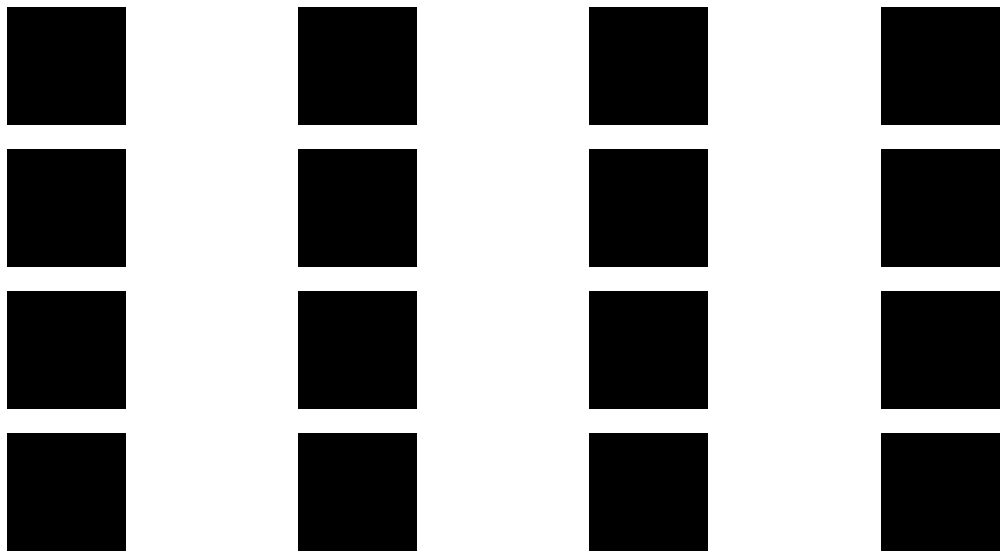

In [24]:
plt.figure(figsize=(20,10))
for i in range(16):
    vals = train_gen[0][0][0]
    vals = vals.astype('uint8')
    plt.subplot(4,4,i+1)
    plt.imshow(vals)
    print(vals.shape)
    plt.axis('off')
plt.show()

In [25]:
train_gen[0][0].shape

(16, 150, 150, 3)

### 16 batch-size of (150,150,3)

In [26]:
train_gen[0][0][0].shape

(150, 150, 3)

### Image size is (150,150,3)
### model building

In [27]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet',input_shape=(150,150,3),include_top=False)

In [30]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())# not going to reduce the size

model.add(Dense(128,activation='relu'))   # dense layer
model.add(Dropout(0.2)) # removing the bias
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               196736    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 54,533,601
Trainable params: 54,473,057
Non-trainable params: 60,544
_________________________________________________________________


In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_gen,validation_data=valid_gen,epochs=5,verbose=1)

Epoch 1/5
13/13 [==============================] - 332s 17s/step - loss: 0.6890 - accuracy: 0.7108 - val_loss: 281.4572 - val_accuracy: 0.6957
Epoch 2/5
13/13 [==============================] - 151s 11s/step - loss: 0.3171 - accuracy: 0.8725 - val_loss: 82.0213 - val_accuracy: 0.6957
Epoch 3/5
13/13 [==============================] - 118s 9s/step - loss: 0.1997 - accuracy: 0.9363 - val_loss: 56.4938 - val_accuracy: 0.6957
Epoch 4/5
13/13 [==============================] - 119s 9s/step - loss: 0.1990 - accuracy: 0.9216 - val_loss: 22.8482 - val_accuracy: 0.6957
Epoch 5/5
13/13 [==============================] - 111s 8s/step - loss: 0.2179 - accuracy: 0.9314 - val_loss: 20.7043 - val_accuracy: 0.6957


## `overfitting` 

# `END ---------------------------------------`